In [14]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def props_mysql():
    db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",  # your password
                     db="global")        # name of the data base
    return db

In [3]:
def make_query(db, query):
    cur = db.cursor()
    cur.execute(query)
    return cur


In [4]:
query = "select * from Site"
df = pd.read_sql(query, con=props_mysql())

In [5]:
keep_site_fields = ["IDSite", "Site_Country", "Site_City_State_Region",
                    "Site_Soil_Classification_Name","Site_Soil_Sand_Percentage", "Site_Soil_Silt_Percentage",
                   "Site_Soil_pH", "Site_Soil_Organic_Matter_Percentage", "Site_Soil_N_Percentage",
                   "Site_Soil_C_Percentage", "Site_Precipitation_mm", "Site_Temperature_Celsius"] 

In [6]:
#Keeping only some interesting fields
sites = df[keep_site_fields]
#removing NA
sites = sites.replace('NA',np.NaN)

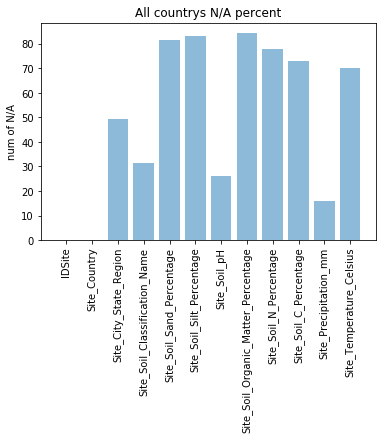

In [228]:
def make_nan_chart(df, title="All countrys N/A percent"):
    nans = df.isnull().sum()
    x_axis = list(nans.index)
    x_pos = np.arange(len(x_axis))
    y_axis = list(nans.values)
    y_percent = map(lambda y: (y*1.0/int(df.shape[0]))*100, y_axis)
    plt.bar(x_pos, y_percent, align='center', alpha=0.5)
    plt.xticks(x_pos, x_axis,  rotation='vertical')
    plt.ylabel('num of N/A') 
    plt.title(title)
    plt.show()

make_nan_chart(sites)

In [229]:
#Quero escolher uma regiao que tenha dados os suficientes para serem trabalhados nas outras tabelas
#checando numero de eventos por regiao
query = str("select count(*) as qtd_samples, Site_Country from Site group by Site_Country")
df = pd.read_sql(query, con=props_mysql())
df = df.loc[df['qtd_samples'] >= 20].sort_values(['qtd_samples'], ascending=[0])
lista_paises = list(df['Site_Country'].values)  
    

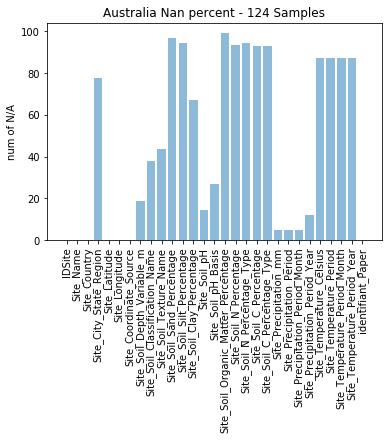

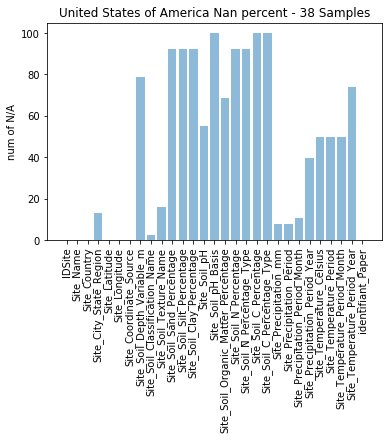

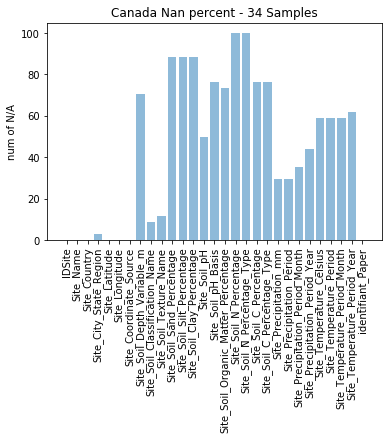

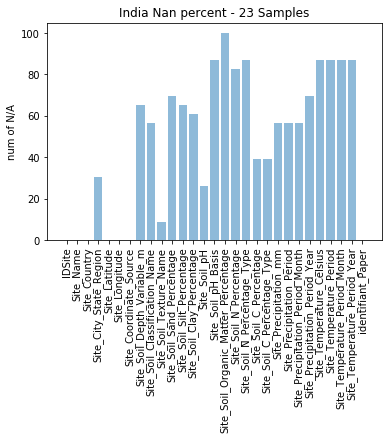

In [230]:
#checando nulos por regiao
for pais in lista_paises:
    query = str("select * from Site where Site_Country='{}'".format(pais))
    df = pd.read_sql(query, con=props_mysql())
    #Keeping only some interesting fields
    #removing NA
    country_data = df.replace('NA',np.NaN)
    make_nan_chart(country_data, title= str(pais)+" Nan percent - "+ str(country_data.shape[0]) + " Samples")
    
    

In [247]:
#Testando com australa
fields_uteis = ['IDSite', 'Site_Soil_Depth_Variable_m', 'Site_Soil_pH', 'Site_Precipitation_mm']
query = str("select IDSite, Site_Soil_Depth_Variable_m, Site_Soil_pH, Site_Precipitation_mm from Site where Site_Country= '{}'").format('Australia')
df = pd.read_sql(query, con=props_mysql())
df_australia = df.replace('NA',np.NaN)
df_australia = df_australia.dropna().reset_index()
print "Temos {} sites com todos os dados que precisamos no momento".format(len(df_australia['IDSite'].unique()))
lista_IDSites = list(df_australia['IDSite'])

Temos 96 sites com todos os dados que precisamos no momento


In [257]:
lista_teste = lista_IDSites[:1]
lista_teste

[71]

In [256]:
for id in lista_teste:
    query = str("select * from Crop as crop"
               " join Crop_Sequence_Trt as crop_s"
               " on crop.IDRotation_CropSystem = crop_s.IDRotation"
               " join Site as site"
               " on crop_s.IDSite_Site = site.IDSite"
               " where site.IDSite={}").format(id)
    df = pd.read_sql(query, con=props_mysql())
    display(df.head(1).T)

,0
IDCrop,990
Crop_Sequence_Treatment_Name,Erect grain legume species and rainfed conditions
Crop_Site_Growing_Season_ID,11
Crop_Growing_Season_Year_First,1993
Crop_Growing_Season_Year_Last,1993
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Triticum aestivum
Crop_Species_Common_Name,Common wheat
Crop_Species_Legume,0
Crop_Date_Seeding,07 May 1993


,0
IDCrop,1029
Crop_Sequence_Treatment_Name,Erect grain legume species and rainfed conditions
Crop_Site_Growing_Season_ID,13
Crop_Growing_Season_Year_First,1993
Crop_Growing_Season_Year_Last,1993
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Triticum aestivum
Crop_Species_Common_Name,Common wheat
Crop_Species_Legume,0
Crop_Date_Seeding,02 Jun. 1993


,0
IDCrop,1309
Crop_Sequence_Treatment_Name,"Narrowleaf lupine-Common wheat, Sowing 1"
Crop_Site_Growing_Season_ID,38
Crop_Growing_Season_Year_First,1992
Crop_Growing_Season_Year_Last,1992
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Lupinus angustifolius
Crop_Species_Common_Name,Narrowleaf lupine
Crop_Species_Legume,1
Crop_Date_Seeding,05 May 1992


,0
IDCrop,2442
Crop_Sequence_Treatment_Name,Narrowleaf lupine
Crop_Site_Growing_Season_ID,111
Crop_Growing_Season_Year_First,1998
Crop_Growing_Season_Year_Last,1998
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Lupinus angustifolius
Crop_Species_Common_Name,Narrowleaf lupine
Crop_Species_Legume,1
Crop_Date_Seeding,NA NA 1998


,0
IDCrop,2443
Crop_Sequence_Treatment_Name,Narrowleaf lupine
Crop_Site_Growing_Season_ID,112
Crop_Growing_Season_Year_First,1998
Crop_Growing_Season_Year_Last,1998
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Lupinus angustifolius
Crop_Species_Common_Name,Narrowleaf lupine
Crop_Species_Legume,1
Crop_Date_Seeding,NA NA 1998


,0
IDCrop,2996
Crop_Sequence_Treatment_Name,"Cowpea, cultivated"
Crop_Site_Growing_Season_ID,194
Crop_Growing_Season_Year_First,1983
Crop_Growing_Season_Year_Last,1983
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Vigna unguiculata
Crop_Species_Common_Name,Cowpea
Crop_Species_Legume,1
Crop_Date_Seeding,04 Jan. 1983


,0
IDCrop,2998
Crop_Sequence_Treatment_Name,"Cowpea, cultivated"
Crop_Site_Growing_Season_ID,195
Crop_Growing_Season_Year_First,1983
Crop_Growing_Season_Year_Last,1984
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Vigna unguiculata
Crop_Species_Common_Name,Cowpea
Crop_Species_Legume,1
Crop_Date_Seeding,20 Dec. 1983


,0
IDCrop,3000
Crop_Sequence_Treatment_Name,"Cowpea, cultivated"
Crop_Site_Growing_Season_ID,196
Crop_Growing_Season_Year_First,1984
Crop_Growing_Season_Year_Last,1985
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Vigna unguiculata
Crop_Species_Common_Name,Cowpea
Crop_Species_Legume,1
Crop_Date_Seeding,20 Dec. 1984


,0
IDCrop,5853
Crop_Sequence_Treatment_Name,Common wheat
Crop_Site_Growing_Season_ID,350
Crop_Growing_Season_Year_First,1984
Crop_Growing_Season_Year_Last,1984
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Triticum aestivum
Crop_Species_Common_Name,Common wheat
Crop_Species_Legume,0
Crop_Date_Seeding,28 May 1984


,0
IDCrop,5854
Crop_Sequence_Treatment_Name,Common wheat
Crop_Site_Growing_Season_ID,353
Crop_Growing_Season_Year_First,1984
Crop_Growing_Season_Year_Last,1984
Crop_Growing_Season_Number,1
Crop_Species_Scientific_Name,Triticum aestivum
Crop_Species_Common_Name,Common wheat
Crop_Species_Legume,0
Crop_Date_Seeding,28 May 1984
